In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset
data = pd.read_csv(r'C:\Users\shamli\Downloads\chatgpt_reviews.csv')

# Preprocessing
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

data['cleaned_review'] = data['review'].apply(preprocess_text)
data.to_csv('cleaned_chatgpt_reviews.csv', index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shamli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shamli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shamli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


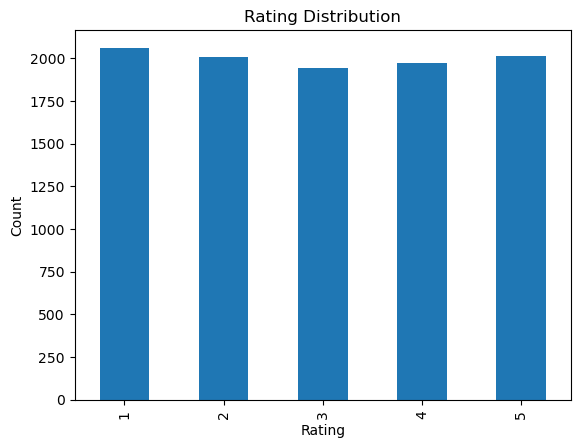

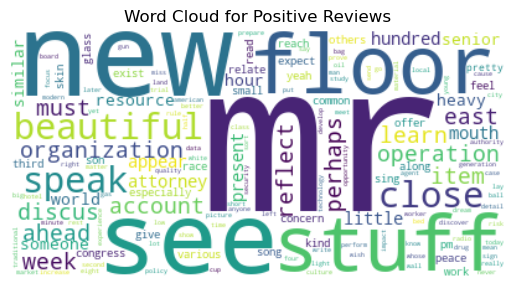

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sentiment distribution
data['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Word cloud for positive reviews
positive_reviews = ' '.join(data[data['rating'] >= 4]['cleaned_review'])
wordcloud_pos = WordCloud(background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Vectorize text
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['cleaned_review']).toarray()
y = data['rating'].apply(lambda x: 1 if x > 3 else 0)  # Binary sentiment (Positive: 1, Negative: 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68      1209
           1       0.39      0.22      0.28       791

    accuracy                           0.56      2000
   macro avg       0.50      0.50      0.48      2000
weighted avg       0.52      0.56      0.52      2000



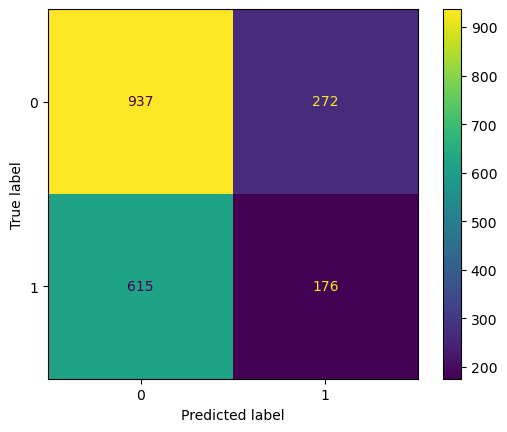

AUC-ROC: 0.49876191940137127


In [7]:
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc}")

In [9]:
import streamlit as st
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('cleaned_chatgpt_reviews.csv')

# Sidebar
st.sidebar.title("AI Echo Sentiment Analysis")
st.sidebar.write("Filter and visualize data insights.")

# Sentiment distribution
st.title("Sentiment Distribution")
rating_counts = data['rating'].value_counts().sort_index()
st.bar_chart(rating_counts)

# Word Cloud
st.title("Word Cloud")
wordcloud = WordCloud(background_color='white').generate(' '.join(data['cleaned_review']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
st.pyplot()


2025-05-01 22:13:23.115 
  command:

    streamlit run C:\Users\shamli\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

<Figure size 640x480 with 0 Axes>